Научиться определять мошеннические обьявления с вакансиями (бинарная классификация)

Загрузка датасета

In [277]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [278]:
df = pd.read_csv('fake_job_postings.csv')

In [279]:
df.head(3)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0


In [280]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [281]:
df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


Проверим пропущенные значения

In [282]:
import numpy as np

count = len(df)
print('title NaN - {}%'.format(df.title.isna().sum() / float(count) * 100))
print('location NaN - {}%'.format(df.location.isna().sum() / float(count) * 100))
print('department NaN - {}%'.format(df.department.isna().sum() / float(count) * 100))
print('salary_range NaN - {}%'.format(df.salary_range.isna().sum() / float(count) * 100))
print('company_profile NaN - {}%'.format(df.company_profile.isna().sum() / float(count) * 100))
print('description NaN - {}%'.format(df.description.isna().sum() / float(count) * 100))
print('requirements NaN - {}%'.format(df.requirements.isna().sum() / float(count) * 100))
print('benefits NaN - {}%'.format(df.benefits.isna().sum() / float(count) * 100))
print('telecommuting NaN - {}%'.format(df.telecommuting.isna().sum() / float(count) * 100))
print('has_company_logo NaN - {}%'.format(df.has_company_logo.isna().sum() / float(count) * 100))
print('has_questions NaN - {}%'.format(df.has_questions.isna().sum() / float(count) * 100))
print('employment_type NaN - {}%'.format(df.employment_type.isna().sum() / float(count) * 100))
print('required_experience NaN - {}%'.format(df.required_experience.isna().sum() / float(count) * 100))
print('required_education NaN - {}%'.format(df.required_education.isna().sum() / float(count) * 100))
print('industry NaN - {}%'.format(df.industry.isna().sum() / float(count) * 100))
print('function NaN - {}%'.format(df.function.isna().sum() / float(count) * 100))

title NaN - 0.0%
location NaN - 1.9351230425055927%
department NaN - 64.58053691275167%
salary_range NaN - 83.95973154362416%
company_profile NaN - 18.501118568232663%
description NaN - 0.005592841163310962%
requirements NaN - 15.072706935123042%
benefits NaN - 40.324384787472034%
telecommuting NaN - 0.0%
has_company_logo NaN - 0.0%
has_questions NaN - 0.0%
employment_type NaN - 19.41275167785235%
required_experience NaN - 39.42953020134228%
required_education NaN - 45.32997762863535%
industry NaN - 27.421700223713646%
function NaN - 36.10178970917226%


In [283]:
print('Количество уникальных заголовков - {}'.format(len(np.unique(df.title))))
print('Количество уникальных департаментов - {}'.format(len(np.unique(df[~df.department.isna()].department))))
print('Количество уникальных локаций - {}'.format(len(np.unique(df[~df.location.isna()].location))))

Количество уникальных заголовков - 11231
Количество уникальных департаментов - 1337
Количество уникальных локаций - 3105


<AxesSubplot:title={'center':'fraudulent'}>

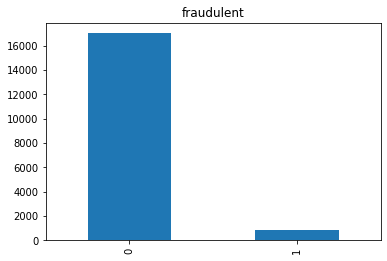

In [284]:
import matplotlib.pyplot as plt

df["fraudulent"].value_counts().plot(kind='bar', title='fraudulent')

<AxesSubplot:title={'center':'telecommuting'}>

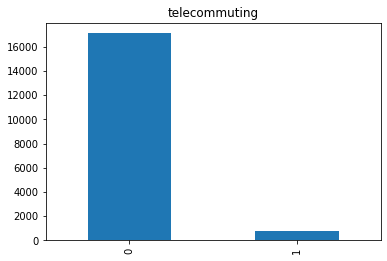

In [285]:
df["telecommuting"].value_counts().plot(kind='bar', title='telecommuting')

<AxesSubplot:title={'center':'has_company_logo'}>

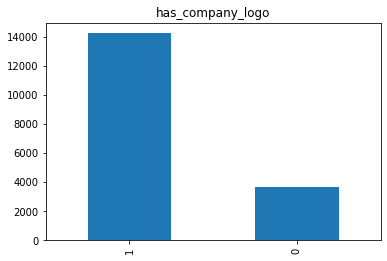

In [286]:
df["has_company_logo"].value_counts().plot(kind='bar', title='has_company_logo')

<AxesSubplot:title={'center':'has_questions'}>

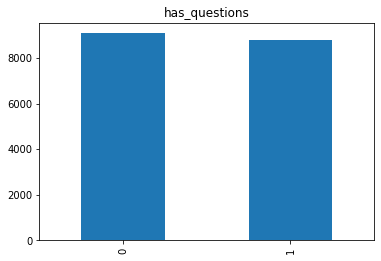

In [287]:
df["has_questions"].value_counts().plot(kind='bar', title='has_questions')

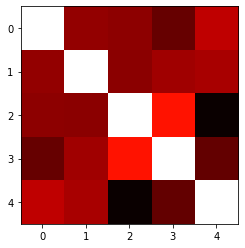

In [288]:
correlation_matrix = df.corr()
plt.imshow(correlation_matrix, cmap='hot', interpolation='nearest')

Уберем пропущенные значения

In [289]:
count = len(df)
print('title NaN - {}%'.format(df.title.isna().sum() / float(count) * 100))


title NaN - 0.0%


In [290]:
print('location NaN - {}%'.format(df.location.isna().sum() / float(count) * 100))
df.location.fillna(" ",inplace = True)
print('location NaN - {}%'.format(df.location.isna().sum() / float(count) * 100))

location NaN - 1.9351230425055927%
location NaN - 0.0%


In [291]:
print('department NaN - {}%'.format(df.department.isna().sum() / float(count) * 100))
df.department.fillna(" ",inplace = True)
print('department NaN - {}%'.format(df.department.isna().sum() / float(count) * 100))

department NaN - 64.58053691275167%
department NaN - 0.0%


In [292]:
print('salary_range NaN - {}%'.format(df.salary_range.isna().sum() / float(count) * 100))
df.salary_range.fillna(" ",inplace = True)
print('salary_range NaN - {}%'.format(df.salary_range.isna().sum() / float(count) * 100))

salary_range NaN - 83.95973154362416%
salary_range NaN - 0.0%


In [293]:
print('company_profile NaN - {}%'.format(df.company_profile.isna().sum() / float(count) * 100))
df.company_profile.fillna(" ",inplace = True)
print('company_profile NaN - {}%'.format(df.company_profile.isna().sum() / float(count) * 100))

company_profile NaN - 18.501118568232663%
company_profile NaN - 0.0%


In [294]:
print('description NaN - {}%'.format(df.description.isna().sum() / float(count) * 100))
df.description.fillna(" ",inplace = True)
print('description NaN - {}%'.format(df.description.isna().sum() / float(count) * 100))

description NaN - 0.005592841163310962%
description NaN - 0.0%


In [295]:
print('requirements NaN - {}%'.format(df.requirements.isna().sum() / float(count) * 100))
df.requirements.fillna(" ",inplace = True)
print('requirements NaN - {}%'.format(df.requirements.isna().sum() / float(count) * 100))

requirements NaN - 15.072706935123042%
requirements NaN - 0.0%


In [296]:
print('benefits NaN - {}%'.format(df.benefits.isna().sum() / float(count) * 100))
df.benefits.fillna(" ",inplace = True)
print('benefits NaN - {}%'.format(df.benefits.isna().sum() / float(count) * 100))


benefits NaN - 40.324384787472034%
benefits NaN - 0.0%


In [297]:
print('employment_type NaN - {}%'.format(df.employment_type.isna().sum() / float(count) * 100))
df.employment_type.fillna(" ",inplace = True)
print('employment_type NaN - {}%'.format(df.employment_type.isna().sum() / float(count) * 100))

employment_type NaN - 19.41275167785235%
employment_type NaN - 0.0%


In [298]:
print('required_experience NaN - {}%'.format(df.required_experience.isna().sum() / float(count) * 100))
df.required_experience.fillna(" ",inplace = True)
print('required_experience NaN - {}%'.format(df.required_experience.isna().sum() / float(count) * 100))

required_experience NaN - 39.42953020134228%
required_experience NaN - 0.0%


In [299]:
print('required_education NaN - {}%'.format(df.required_education.isna().sum() / float(count) * 100))
df.required_education.fillna(" ",inplace = True)
print('required_education NaN - {}%'.format(df.required_education.isna().sum() / float(count) * 100))

required_education NaN - 45.32997762863535%
required_education NaN - 0.0%


In [300]:
print('industry NaN - {}%'.format(df.industry.isna().sum() / float(count) * 100))
df.industry.fillna(" ",inplace = True)
print('industry NaN - {}%'.format(df.industry.isna().sum() / float(count) * 100))

industry NaN - 27.421700223713646%
industry NaN - 0.0%


In [301]:
print('function NaN - {}%'.format(df.function.isna().sum() / float(count) * 100))
df.function.fillna(" ",inplace = True)
print('function NaN - {}%'.format(df.function.isna().sum() / float(count) * 100))

function NaN - 36.10178970917226%
function NaN - 0.0%


In [302]:
del df['job_id']

In [303]:
print('Количество уникальных требований к образованию - {}'.format(len(np.unique(df.required_education))))

Количество уникальных требований к образованию - 14


In [304]:
print(np.unique(df.required_education))

[' ' 'Associate Degree' "Bachelor's Degree" 'Certification' 'Doctorate'
 'High School or equivalent' "Master's Degree" 'Professional'
 'Some College Coursework Completed' 'Some High School Coursework'
 'Unspecified' 'Vocational' 'Vocational - Degree'
 'Vocational - HS Diploma']


In [305]:
education_to_index = {}
for i, education in enumerate(np.unique(df.required_education)):
    education_to_index[education] = i

In [306]:
education_to_index

{' ': 0,
 'Associate Degree': 1,
 "Bachelor's Degree": 2,
 'Certification': 3,
 'Doctorate': 4,
 'High School or equivalent': 5,
 "Master's Degree": 6,
 'Professional': 7,
 'Some College Coursework Completed': 8,
 'Some High School Coursework': 9,
 'Unspecified': 10,
 'Vocational': 11,
 'Vocational - Degree': 12,
 'Vocational - HS Diploma': 13}

In [307]:
def enc_education(education):
    return education_to_index[education]

In [308]:
df['required_education'] = df.required_education.apply(enc_education)

In [309]:
df.head()

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,0,1,0,Other,Internship,0,,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,0,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",,,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,0,1,0,,,0,,,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,2,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",,,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,2,Hospital & Health Care,Health Care Provider,0


In [310]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                17880 non-null  object
 1   location             17880 non-null  object
 2   department           17880 non-null  object
 3   salary_range         17880 non-null  object
 4   company_profile      17880 non-null  object
 5   description          17880 non-null  object
 6   requirements         17880 non-null  object
 7   benefits             17880 non-null  object
 8   telecommuting        17880 non-null  int64 
 9   has_company_logo     17880 non-null  int64 
 10  has_questions        17880 non-null  int64 
 11  employment_type      17880 non-null  object
 12  required_experience  17880 non-null  object
 13  required_education   17880 non-null  int64 
 14  industry             17880 non-null  object
 15  function             17880 non-null  object
 16  frau

In [311]:
print('Количество уникальных требований к опыту - {}'.format(len(np.unique(df.required_experience))))

Количество уникальных требований к опыту - 8


In [312]:
print(np.unique(df.required_experience))

[' ' 'Associate' 'Director' 'Entry level' 'Executive' 'Internship'
 'Mid-Senior level' 'Not Applicable']


In [313]:
experience_to_index = {}
for i, experience in enumerate(np.unique(df.required_experience)):
    experience_to_index[experience] = i

print(experience_to_index)

{' ': 0, 'Associate': 1, 'Director': 2, 'Entry level': 3, 'Executive': 4, 'Internship': 5, 'Mid-Senior level': 6, 'Not Applicable': 7}


In [314]:
def enc_experience(experience):
    return experience_to_index[experience]

In [315]:
df['required_experience'] = df.required_experience.apply(enc_experience)

In [316]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                17880 non-null  object
 1   location             17880 non-null  object
 2   department           17880 non-null  object
 3   salary_range         17880 non-null  object
 4   company_profile      17880 non-null  object
 5   description          17880 non-null  object
 6   requirements         17880 non-null  object
 7   benefits             17880 non-null  object
 8   telecommuting        17880 non-null  int64 
 9   has_company_logo     17880 non-null  int64 
 10  has_questions        17880 non-null  int64 
 11  employment_type      17880 non-null  object
 12  required_experience  17880 non-null  int64 
 13  required_education   17880 non-null  int64 
 14  industry             17880 non-null  object
 15  function             17880 non-null  object
 16  frau

In [317]:
print('Количество уникальных требований к опыту - {}'.format(len(np.unique(df.salary_range))))

Количество уникальных требований к опыту - 875


Конвертация категориальных признаков

In [318]:
cat_cols = [
    "telecommuting",
    "has_company_logo",
    "has_questions",
    "required_experience",
    "required_education"
]

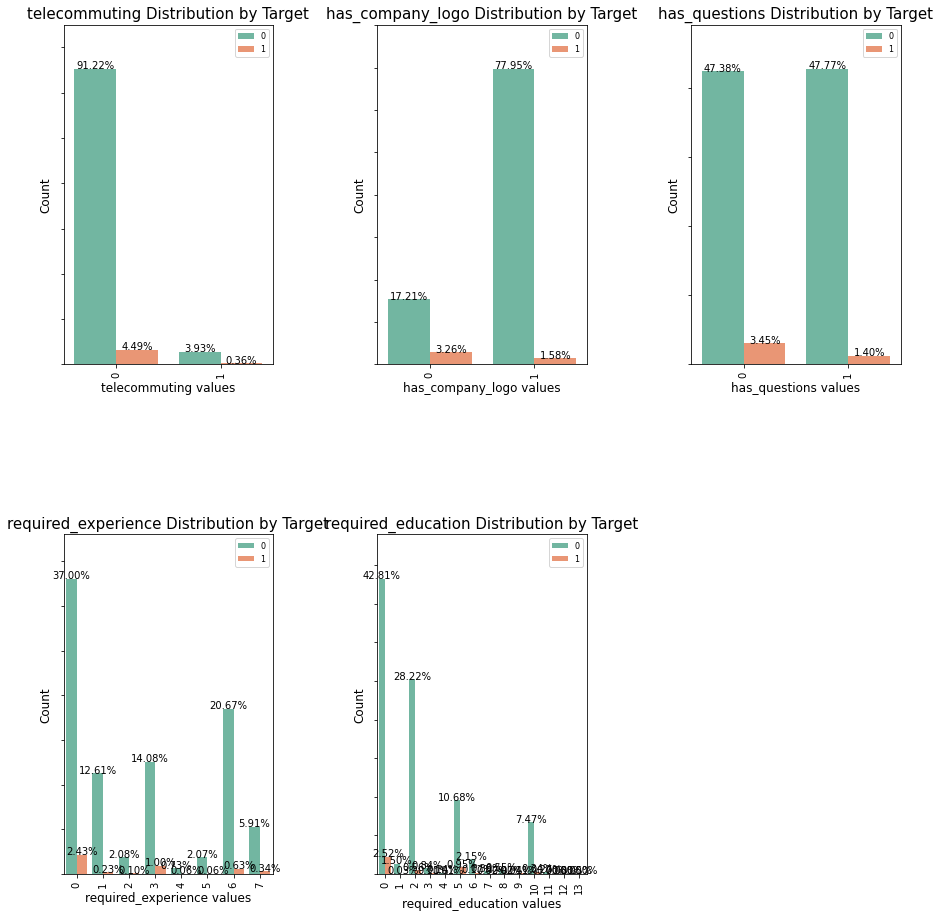

In [319]:
import seaborn as sns
import matplotlib.gridspec as gridspec

grid = gridspec.GridSpec(3, 3, wspace=0.5, hspace=0.5)
plt.figure(figsize=(15,25))

for n, col in enumerate(df[cat_cols]): 
    ax = plt.subplot(grid[n])
    sns.countplot(x=col, data=df, hue='fraudulent', palette='Set2') 
    ax.set_ylabel('Count', fontsize=12)
    ax.set_title(f'{col} Distribution by Target', fontsize=15)
    ax.set_xlabel(f'{col} values', fontsize=12)
    xlabels = ax.get_xticklabels() 
    ylabels = ax.get_yticklabels() 
    ax.set_xticklabels(xlabels,  fontsize=10)
    ax.set_yticklabels(ylabels,  fontsize=10)
    plt.legend(fontsize=8)
    plt.xticks(rotation=90) 
    total = len(df)
    sizes=[]
    for p in ax.patches:
        height = p.get_height()
        sizes.append(height)
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(height/total*100),
                ha="center", fontsize=10) 
    ax.set_ylim(0, max(sizes) * 1.15)

Объединим все текстовые признаки в один

In [320]:
text_cols = [
    'title',
    'location',
    'department',
    'company_profile',
    'description',
    'requirements',
    'benefits',
    'employment_type',
    'industry',
    'function',
    'salary_range'
]

df['text'] = ''

for col in text_cols:
    df['text'] = df['text'] + df[col]
    del df[col]

In [321]:
 df.text[0]

"Marketing InternUS, NY, New YorkMarketingWe're Food52, and we've created a groundbreaking and award-winning cooking site. We support, connect, and celebrate home cooks, and give them everything they need in one place.We have a top editorial, business, and engineering team. We're focused on using technology to find new and better ways to connect people around their specific food interests, and to offer them superb, highly curated information about food and cooking. We attract the most talented home cooks and contributors in the country; we also publish well-known professionals like Mario Batali, Gwyneth Paltrow, and Danny Meyer. And we have partnerships with Whole Foods Market and Random House.Food52 has been named the best food website by the James Beard Foundation and IACP, and has been featured in the New York Times, NPR, Pando Daily, TechCrunch, and on the Today Show.We're located in Chelsea, in New York City.Food52, a fast-growing, James Beard Award-winning online food community a

In [322]:
df.head()

,telecommuting,has_company_logo,has_questions,required_experience,required_education,fraudulent,text
0,0,1,0,5,0,0,"Marketing InternUS, NY, New YorkMarketingWe're..."
1,0,1,0,7,0,0,"Customer Service - Cloud Video ProductionNZ, ,..."
2,0,1,0,0,0,0,"Commissioning Machinery Assistant (CMA)US, IA,..."
3,0,1,0,6,2,0,"Account Executive - Washington DCUS, DC, Washi..."
4,0,1,1,6,2,0,"Bill Review ManagerUS, FL, Fort Worth SpotSour..."


In [323]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   telecommuting        17880 non-null  int64 
 1   has_company_logo     17880 non-null  int64 
 2   has_questions        17880 non-null  int64 
 3   required_experience  17880 non-null  int64 
 4   required_education   17880 non-null  int64 
 5   fraudulent           17880 non-null  int64 
 6   text                 17880 non-null  object
dtypes: int64(6), object(1)
memory usage: 977.9+ KB


Применим one-hot encoding

In [324]:
def one_hot(df, cols):
    for col in cols:
        dummies = pd.get_dummies(df[col], prefix=col, drop_first=False)
        df = pd.concat([df, dummies], axis=1)
        del df[col]
    return df

In [325]:
cols = [
    "required_experience",
    "required_education"
]

df = one_hot(df, cols)

In [326]:
df.head()

,telecommuting,has_company_logo,has_questions,fraudulent,text,required_experience_0,required_experience_1,required_experience_2,required_experience_3,required_experience_4,...,required_education_4,required_education_5,required_education_6,required_education_7,required_education_8,required_education_9,required_education_10,required_education_11,required_education_12,required_education_13
0,0,1,0,0,"Marketing InternUS, NY, New YorkMarketingWe're...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,"Customer Service - Cloud Video ProductionNZ, ,...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,"Commissioning Machinery Assistant (CMA)US, IA,...",1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,"Account Executive - Washington DCUS, DC, Washi...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,1,0,"Bill Review ManagerUS, FL, Fort Worth SpotSour...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Обработаем текстовые признаки

In [327]:
import nltk
nltk.download('all', quiet=True)

import nltk.corpus
import string

stop = set(nltk.corpus.stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

Выполним лемматизацию

In [328]:
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet

def get_simple_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            pos = pos_tag([i.strip()])
            word = lemmatizer.lemmatize(i.strip(),get_simple_pos(pos[0][1]))
            final_text.append(word.lower())
    return " ".join(final_text) 

df.text = df.text.apply(lemmatize_words)

In [329]:
df.head()

,telecommuting,has_company_logo,has_questions,fraudulent,text,required_experience_0,required_experience_1,required_experience_2,required_experience_3,required_experience_4,...,required_education_4,required_education_5,required_education_6,required_education_7,required_education_8,required_education_9,required_education_10,required_education_11,required_education_12,required_education_13
0,0,1,0,0,"marketing internus, ny, new yorkmarketingwe're...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,"customer service cloud video productionnz, auc...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,"commissioning machinery assistant (cma)us, ia,...",1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,"account executive washington dcus, dc, washing...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,1,0,"bill review managerus, fl, fort worth spotsour...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


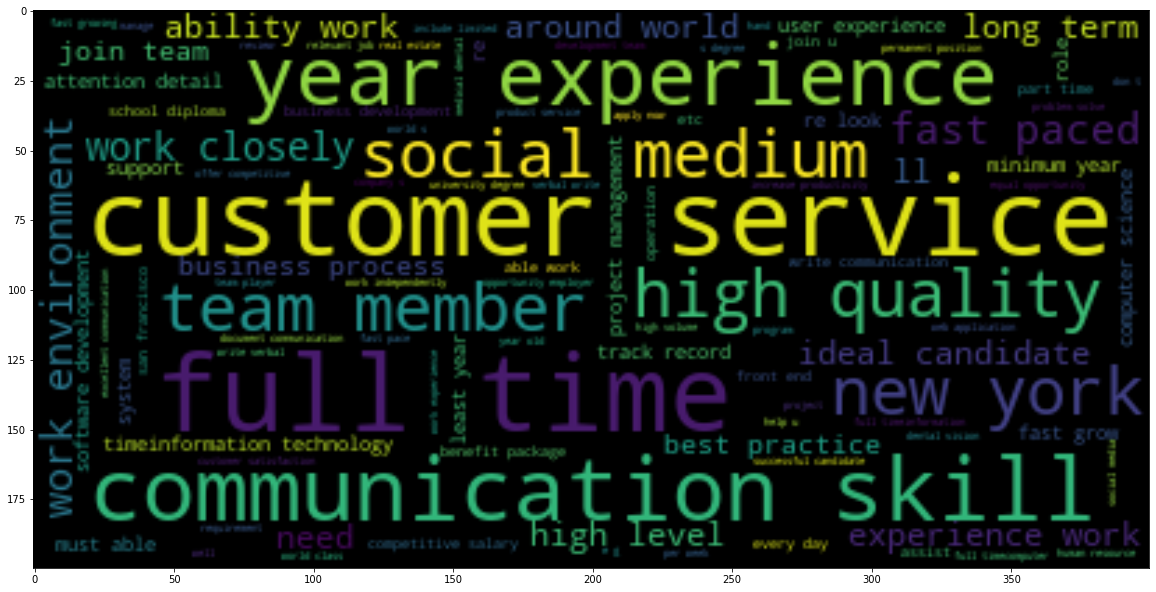

In [330]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
from wordcloud import WordCloud

plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 100).generate(" ".join(df.text))
plt.imshow(wc , interpolation = 'bilinear')

In [333]:
from sklearn.model_selection import train_test_split

train_data , test_data = train_test_split(df, test_size = 0.2 , random_state = 0)
train_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)

In [334]:
print('Размер обучающей выборки - {}'.format(len(train_data)))
print('Размер тестовой выборки - {}'.format(len(test_data)))

Размер обучающей выборки - 14304
Размер тестовой выборки - 3576


Векторизуем текстовое описание вакансии

In [339]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=300, use_idf=True, ngram_range=(1,3))
tfidf.fit(train_data.text)

TfidfVectorizer(max_features=300, ngram_range=(1, 3))

In [357]:
tfidf_train_data = train_data.join(pd.DataFrame(tfidf.transform(train_data.text).toarray()))
del tfidf_train_data['text']

In [358]:
tfidf_test_data = test_data.join(pd.DataFrame(tfidf.transform(test_data.text).toarray()))
del tfidf_test_data['text']

In [360]:
tfidf_train_data.head(10)

,telecommuting,has_company_logo,has_questions,fraudulent,required_experience_0,required_experience_1,required_experience_2,required_experience_3,required_experience_4,required_experience_5,...,290,291,292,293,294,295,296,297,298,299
0,0,1,1,0,1,0,0,0,0,0,...,0.173859,0.132470,0.000000,0.108701,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0,1,1,0,1,0,0,0,0,0,...,0.000000,0.028627,0.052428,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0,1,1,0,0,0,0,0,0,0,...,0.000000,0.078861,0.000000,0.064711,0.000000,0.035510,0.000000,0.000000,0.045751,0.000000
3,0,1,1,0,0,0,0,0,0,0,...,0.055445,0.225309,0.051580,0.000000,0.102589,0.000000,0.000000,0.000000,0.049017,0.000000
4,0,1,0,0,0,0,0,0,0,1,...,0.000000,0.335286,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.233418,0.187166
5,0,0,0,0,1,0,0,0,0,0,...,0.000000,0.043216,0.000000,0.000000,0.000000,0.087567,0.097204,0.000000,0.000000,0.000000
6,0,1,0,0,0,0,0,1,0,0,...,0.000000,0.097611,0.059590,0.000000,0.059260,0.000000,0.000000,0.078773,0.000000,0.000000
7,0,0,0,0,1,0,0,0,0,0,...,0.000000,0.056402,0.000000,0.000000,0.000000,0.076191,0.000000,0.000000,0.000000,0.000000
8,0,1,1,0,0,0,0,0,0,0,...,0.000000,0.228793,0.000000,0.000000,0.000000,0.123627,0.000000,0.000000,0.000000,0.000000
9,0,1,1,0,1,0,0,0,0,0,...,0.054204,0.082600,0.100852,0.000000,0.200588,0.000000,0.000000,0.000000,0.047920,0.000000


In [361]:
tfidf_test_data.head(10)

,telecommuting,has_company_logo,has_questions,fraudulent,required_experience_0,required_experience_1,required_experience_2,required_experience_3,required_experience_4,required_experience_5,...,290,291,292,293,294,295,296,297,298,299
0,0,1,1,0,1,0,0,0,0,0,...,0.000000,0.166848,0.043653,0.058676,0.000000,0.064397,0.000000,0.000000,0.124453,0.066528
1,0,1,1,0,1,0,0,0,0,0,...,0.000000,0.029265,0.000000,0.000000,0.053301,0.000000,0.000000,0.000000,0.000000,0.000000
2,0,1,0,0,0,0,0,0,0,0,...,0.142579,0.072424,0.000000,0.000000,0.000000,0.146752,0.081451,0.000000,0.000000,0.000000
3,0,1,0,0,1,0,0,0,0,0,...,0.000000,0.146602,0.000000,0.000000,0.000000,0.132026,0.000000,0.059154,0.255152,0.000000
4,0,0,0,0,1,0,0,0,0,0,...,0.000000,0.058057,0.106327,0.000000,0.105739,0.000000,0.000000,0.000000,0.000000,0.000000
5,0,1,1,0,0,0,0,1,0,0,...,0.000000,0.180781,0.000000,0.074172,0.000000,0.081403,0.067771,0.072946,0.104880,0.000000
6,0,1,1,0,1,0,0,0,0,0,...,0.000000,0.105413,0.000000,0.000000,0.038398,0.028480,0.000000,0.000000,0.000000,0.000000
7,0,1,0,0,0,0,0,0,0,0,...,0.000000,0.112414,0.000000,0.000000,0.000000,0.050619,0.000000,0.181438,0.065217,0.000000
8,0,1,1,0,1,0,0,0,0,0,...,0.069028,0.105190,0.000000,0.000000,0.000000,0.047366,0.000000,0.000000,0.000000,0.000000
9,0,1,0,0,1,0,0,0,0,0,...,0.000000,0.044218,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [362]:
y_train = tfidf_train_data['fraudulent']
X_train = tfidf_train_data[tfidf_train_data.columns.drop('fraudulent')]

In [363]:
y_test = tfidf_test_data['fraudulent']
X_test = tfidf_test_data[tfidf_test_data.columns.drop('fraudulent')]

In [372]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_pred, y_test)

0.9745525727069351

In [368]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_neighbors': range(1, 10)}
model = KNeighborsClassifier()
clf = GridSearchCV(model, parameters)
clf.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 10)})

In [370]:
print(clf.best_params_)
print(clf.best_score_)

{'n_neighbors': 2}
0.9746227662585578


In [371]:
model = KNeighborsClassifier(n_neighbors=2)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_pred, y_test)

0.9781879194630873

In [373]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_pred, y_test)

0.9667225950782998

In [374]:
parameters = {'C': [0.001, 0.01, 0.1, 1.0, 10.0]}
model = LogisticRegression()
clf = GridSearchCV(model, parameters)
clf.fit(X_train, y_train)

print(clf.best_params_)
print(clf.best_score_)

{'C': 10.0}
0.9651846755132321


In [375]:
model = LogisticRegression(C=10.0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_pred, y_test)

0.9692393736017897

In [376]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_pred, y_test)

0.9695190156599552

In [377]:
parameters = {'max_depth': [1, 2, 4, 8, 16, 32, 64]}
model = DecisionTreeClassifier()
clf = GridSearchCV(model, parameters, n_jobs=3)
clf.fit(X_train, y_train)

print(clf.best_params_)
print(clf.best_score_)

{'max_depth': 16}
0.9650449131434801


Лучшее качество

In [378]:
model = DecisionTreeClassifier(max_depth=16)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_pred, y_test)

0.9723154362416108

In [379]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_pred, y_test)

0.982662192393736

In [380]:
parameters = {'hidden_layer_sizes': [(32, 32), (64, 32), (128, 32), (256, 32)]}
model = MLPClassifier()
clf = GridSearchCV(model, parameters, n_jobs=3)
clf.fit(X_train, y_train)

print(clf.best_params_)
print(clf.best_score_)

{'hidden_layer_sizes': (128, 32)}
0.9797261459267752


In [384]:
index = []
accuracy = []
for i in range(-4, 1):
    alpha = 10 ** i
    model = MLPClassifier(hidden_layer_sizes=(128, 32), alpha=alpha)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    index.append(i)
    accuracy.append(accuracy_score(y_pred, y_test))

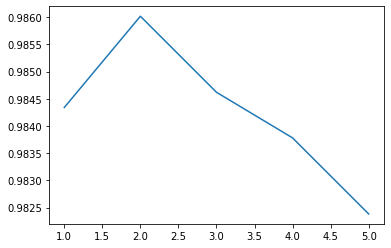

In [247]:
fig, ax = plt.subplots()
ax.plot(index, accuracy)

Лучшее качество получается с помощью нейронно сети с двумя слоями

In [385]:
np.max(accuracy)

0.9835011185682326